# Likelihood Functions

The likelihood ratio for two Gaussian distributions with shifted means and equal variance is monotone.
As such, a threshold test on the likelihood ratio becomes equivalent to a threshold test on the observed value.
Two such distributions and their likelihood ratio appear below.

-0.444444444444 [103] [32]
1.11111111111 [126] [9]
2.66666666667 [143] [0]
4.22222222222 [156] [0]
5.77777777778 [168] [0]
7.33333333333 [178] [0]
8.88888888889 [187] [0]
10.4444444444 [196] [0]


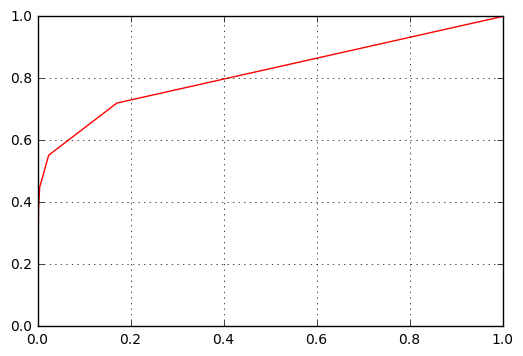

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import scipy.stats

mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
mu1 = 1
variance1 = 9
sigma1 = math.sqrt(variance1)

x = np.linspace(-4, 4, 200)
# compute p1(x)/p0(x) for all x
likelihoodRatio = scipy.stats.norm.logpdf(x,loc=mu1,scale=sigma1)-scipy.stats.norm.logpdf(x,loc=mu0,scale=sigma0)

'''
fig, ax1 = plt.subplots()
ax1.plot(x,mlab.normpdf(x, mu0, sigma0))
ax1.plot(x,mlab.normpdf(x, mu1, sigma1),color='r')
ax2 = ax1.twinx()
ax2.plot(x,likelihoodRatio,'k--')

#plt.show()
'''

tauv = np.linspace(-2,12,10)
# minimum of the likelihood ratio
minRat = np.min(likelihoodRatio)
maxRat = np.max(likelihoodRatio)
PDetection = np.zeros(tauv.shape)
PFP = np.zeros(tauv.shape)
# all values below minRat, integrate from -Inf to Inf over p1(x) for p(detection), and over p0(x) for p(false positive)
for k in range(len(tauv)):
    # get the ratio
    tau = tauv[k]
    if tau <= minRat:
        PDetection[k] = 1.0
        PFP[k] = 1.0
    elif tau >= maxRat:# too large, truncate probs to zero
        PDetection[k] = 0.0
        PFP[k] = 0.0
    else:
        # solve for the intercepts
        # ix : where likelihoodRatio is increasing through tau
        ix = np.where((likelihoodRatio[0:-1] < tau) & (likelihoodRatio[1:] >=tau))[0]
        # iy : where likelihoodRatio is decreasing through tau
        iy = np.where((likelihoodRatio[0:-1] > tau) & (likelihoodRatio[1:] <=tau))[0]
        if ix.shape[0] == 0:
            ix = likelihoodRatio.shape[0]
        if iy.shape[0] == 0:
            # set to index zero
            iy = [0]
        print(tau,ix,iy)
        # for iy: evaluate the CDF at x[iy]
        PDetection[k] = scipy.stats.norm.cdf(x[iy],loc=mu1,scale=sigma1)
        PFP[k] = scipy.stats.norm.cdf(x[iy],loc=mu0,scale=sigma0)
        # for ix: evaluate 1.0-CDF at x[ix]
        PDetection[k] = PDetection[k] + (1.0-scipy.stats.norm.cdf(x[ix],loc=mu1,scale=sigma1))
        PFP[k] = PFP[k] + (1.0-scipy.stats.norm.cdf(x[ix],loc=mu0,scale=sigma0))
        
fig2,ax3 = plt.subplots()
ax3.plot(PFP,PDetection,'r-')
ax3.grid()
plt.show()


## Example of ROC curves

In [ ]:
from scipy.stats import norm

fig, ax1 = plt.subplots()

x = np.linspace(-4, 4, 200)
mu = np.linspace(0.25, 1.5, 6)
for index in range(5):
    mu0 = -mu[index]
    mu1 = mu[index]
    ax1.plot(norm.cdf((x-mu1)/sigma1),norm.cdf((x-mu0)/sigma0))
plt.show()

In general, the likelihood ratio need not be a monotone function.
Consider the example below where two Gaussian distributions, with different means and variances.

In [ ]:
fig, ax1 = plt.subplots()

mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu0, sigma0),'b-')

mu1 = 1
variance1 = 9
sigma1 = math.sqrt(variance1)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu1, sigma1),'r-')

ax2 = ax1.twinx()
ax2.plot(x,np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0)),'k--')

plt.show()

